###### import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###### reading the dataset

In [2]:
df=pd.read_csv("mymoviedb.csv", lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [4]:
# no standard missing values
df.isna().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

###### detecting duplicates

In [5]:
# no duplicated values
df.duplicated().sum()

0

In [6]:
# the data has different movies with the same name
df[df.duplicated("Title", keep=False)].sort_values("Title").head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
3270,2015-05-22,365 Days,This film tracks a hasty marriage through its ...,28.341,12,4.8,te,Romance,https://image.tmdb.org/t/p/original/AoFyZGDgfr...
1424,2020-02-07,365 Days,"A woman falls victim to a dominant mafia boss,...",52.418,6540,7.0,pl,"Drama, Romance",https://image.tmdb.org/t/p/original/6KwrHucIE3...
5993,1984-10-09,A Christmas Carol,A bitter old miser who makes excuses for his u...,18.546,241,7.3,en,"Drama, Fantasy, TV Movie, Family",https://image.tmdb.org/t/p/original/kGmpIkjVRW...
2052,2009-11-04,A Christmas Carol,Miser Ebenezer Scrooge is awakened on Christma...,39.916,3732,6.9,en,"Animation, Family, Drama, Fantasy",https://image.tmdb.org/t/p/original/goHDZUnqZJ...
2169,2010-04-30,A Nightmare on Elm Street,The film that brings back horror icon Freddy K...,38.399,2187,5.5,en,"Horror, Mystery, Thriller",https://image.tmdb.org/t/p/original/4W2GvVM89X...


In [7]:
# the data has different seasons of the same movie
df[df.duplicated("Overview",keep=False)].head(4)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
1736,2015-04-25,Parasyte: Part 2,"Alien pods come to Earth and, naturally, start...",45.155,121,7.0,ja,"Science Fiction, Horror",https://image.tmdb.org/t/p/original/qO8zQ9dSAD...
1774,2014-11-29,Parasyte: Part 1,"Alien pods come to Earth and, naturally, start...",44.344,176,7.1,ja,"Science Fiction, Horror",https://image.tmdb.org/t/p/original/lNzCFguC8w...
2558,1993-09-23,Dragon Ball Z Side Story: Plan to Eradicate th...,Dr. Raichi is one of the only survivors of the...,34.174,29,6.3,ja,"Action, Adventure, Animation",https://image.tmdb.org/t/p/original/v8Fj0USMWp...
2567,2010-11-11,Dragon Ball: Plan to Eradicate the Super Saiyans,Dr. Raichi is one of the only survivors of the...,34.103,234,7.1,ja,"Action, Animation, Adventure",https://image.tmdb.org/t/p/original/vkZJ7MIa9X...


###### the data has no duplicates

###### summary:
* the above data has 9827 rows and 9 columns
* data has 9 columns 6 of them are object, 2 floats and 1 integer
* data has no duplicates or missing values
* all the columns have the right data type except for "Release_Date" column which needs to be changed to datetime
* the "Poster_Url" column is unuseful

In [8]:
# dropping "Poster_Url" column
df.drop(columns="Poster_Url", inplace=True)

###### finding the most common genre

In [9]:
# splitting the "Genre" column
splited= df["Genre"].str.split(", ", n = -1, expand = True)
splited.head()

,0,1,2,3,4,5,6,7
0,Action,Adventure,Science Fiction,None,None,None,None,None
1,Crime,Mystery,Thriller,None,None,None,None,None
2,Thriller,None,None,None,None,None,None,None
3,Animation,Comedy,Family,Fantasy,None,None,None,None
4,Action,Adventure,Thriller,War,None,None,None,None


In [10]:
classified=splited[splited.columns].apply(pd.Series.value_counts)
classified.head()

,0,1,2,3,4,5,6,7
Action,1570,726,290,74,19.0,7.0,NaN,NaN
Adventure,586,691,383,147,40.0,5.0,1.0,NaN
Animation,805,423,165,33,9.0,3.0,1.0,NaN
Comedy,1484,868,451,183,43.0,1.0,1.0,NaN
Crime,391,463,283,93,12.0,NaN,NaN,NaN


In [11]:
# getting the number of movies in each type
classified.sum(axis=1, skipna=True).sort_values(ascending=False)

Drama              3744.0
Comedy             3031.0
Action             2686.0
Thriller           2488.0
Adventure          1853.0
Romance            1476.0
Horror             1470.0
Animation          1439.0
Family             1414.0
Fantasy            1308.0
Science Fiction    1273.0
Crime              1242.0
Mystery             773.0
History             427.0
War                 308.0
Music               295.0
Documentary         215.0
TV Movie            214.0
Western             137.0
dtype: float64

###### the most common genre is Drama

###### finding the highly rated movies

In [12]:
# highly rated indexes
high_rates= df["Vote_Average"]>=7

In [13]:
highly_rated= df[high_rates]
highly_rated.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller"
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War"
9,2021-11-03,Eternals,The Eternals are a team of ancient aliens who ...,1537.406,4726,7.2,en,Science Fiction


In [14]:
# types of highly rated movies
splited[high_rates].apply(pd.Series.value_counts).sum(axis=1, skipna=True).sort_values(ascending=False)

Drama              1670.0
Comedy              835.0
Action              723.0
Animation           709.0
Adventure           607.0
Thriller            548.0
Romance             544.0
Family              498.0
Fantasy             472.0
Crime               430.0
Science Fiction     344.0
Mystery             241.0
History             236.0
Horror              192.0
War                 161.0
Music               151.0
Documentary         129.0
TV Movie             74.0
Western              65.0
dtype: float64

###### Most of the highly rated movies are also dramas

###### finding the most viewed movie

In [15]:
# getting its index
movie_index= df['Popularity'].idxmax()
movie_index

0

In [16]:
df[0:1]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction"


###### the most viewed movie is "Spider-Man: No Way Home" which is an Action, Adventure and Science Fiction movie

###### finding when most films were produced

In [17]:
# changing the 'Release_Date' data type to datetime
df['Release_Date']= pd.to_datetime(df['Release_Date'])

In [18]:
# getting the years of releasing
years= pd.DatetimeIndex(df['Release_Date']).year

In [19]:
years.value_counts().head(10)

2021    714
2018    530
2017    510
2019    500
2016    470
2020    453
2015    390
2014    371
2013    348
2011    316
Name: Release_Date, dtype: int64

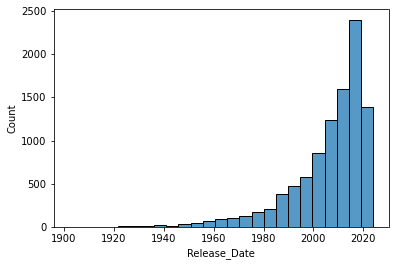

In [47]:
# 1980 marked the beginning of a revolution in the film industry
sns.histplot(x=years, data=df, color="tab:blue", bins=25)
plt.show()

###### 2021 is the year in which the most films were produced

In [23]:
# getting the months of releasing
months= pd.DatetimeIndex(df['Release_Date']).month
months.value_counts().head(10)

10    1024
9      993
12     927
8      885
3      868
7      802
11     789
2      788
6      768
4      669
Name: Release_Date, dtype: int64

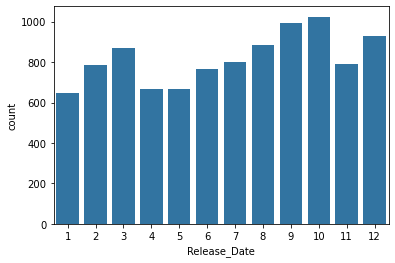

In [24]:
# october is the month in which the most films were released
sns.countplot(x=months, color="tab:blue")
plt.show()

###### there isn't a specific part of the year movies are released in

###### the upcoming movies

In [25]:
# vote count= 0 
zero_vote_count= df[df["Vote_Count"]==0]
zero_vote_count.head(3)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
80,2022-03-30,Sonic the Hedgehog 2,"After settling in Green Hills, Sonic is eager ...",317.159,0,0.0,en,"Action, Science Fiction, Comedy, Family"
210,2023-04-06,Fast & Furious 10,The tenth installment in the Fast Saga.,181.216,0,0.0,en,"Action, Crime"
231,2022-04-22,Dragon Ball Super: Super Hero,"The Red Ribbon Army, an evil organization that...",170.551,0,0.0,ja,"Animation, Science Fiction, Action"


In [26]:
# the vote average = 0
zero_vote_average= df[df["Vote_Average"]==0]
zero_vote_average.head(3)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
80,2022-03-30,Sonic the Hedgehog 2,"After settling in Green Hills, Sonic is eager ...",317.159,0,0.0,en,"Action, Science Fiction, Comedy, Family"
210,2023-04-06,Fast & Furious 10,The tenth installment in the Fast Saga.,181.216,0,0.0,en,"Action, Crime"
231,2022-04-22,Dragon Ball Super: Super Hero,"The Red Ribbon Army, an evil organization that...",170.551,0,0.0,ja,"Animation, Science Fiction, Action"


In [27]:
# movies with 0 vote count and with 0 vote average are the same
zero_vote_average.equals(zero_vote_count)

True

###### movies with 0 vote count and with 0 vote average are the upcomig movies

In [28]:
# their popularity isn't equal to zero 
zero_vote_average["Popularity"]

80      317.159
210     181.216
231     170.551
232     169.964
314     146.548
         ...   
9067     14.082
9134     14.016
9145     14.008
9177     13.978
9713     13.446
Name: Popularity, Length: 100, dtype: float64

###### findng the lowly rated movies

In [29]:
# dropping the upcomming movies
viewed= df.drop(zero_vote_average.index)
viewed.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War"


In [30]:
# lost 100 movie as excepected
viewed.shape

(9727, 8)

In [31]:
low_rates= viewed["Vote_Average"]<=4

In [32]:
lowly_rated= viewed[low_rates]
lowly_rated.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
77,2022-02-04,"Sex, Shame and Tears 2",Twenty years have passed since those two apart...,325.624,5,2.2,es,"Comedy, Drama"
229,2021-12-25,El Paseo 6,The last year High School excursion is the wal...,170.869,5,3.5,es,Comedy
243,1986-01-18,Beautiful Sisters: Flesh Slave,A maniac breaks into the apartment of two sist...,167.255,4,4.0,ja,"Crime, Horror"
308,2021-10-27,Nobody Sleeps in the Woods Tonight 2,When something horrible happens to the only su...,148.013,148,4.0,pl,"Horror, Thriller, Comedy"
329,2021-07-06,Why Women Cheat,The male lead is the king of a small island na...,141.695,3,3.3,en,Romance


In [33]:
# types of lowly rated movies
viewed_splited= viewed["Genre"].str.split(", ", n = -1, expand = True)
viewed_splited[low_rates].apply(pd.Series.value_counts).sum(axis=1, skipna=True).sort_values(ascending=False)

Horror             28.0
Comedy             27.0
Action             27.0
Thriller           23.0
Drama              21.0
Science Fiction    21.0
Adventure          15.0
Fantasy            12.0
Romance            12.0
Animation           8.0
Crime               5.0
Documentary         5.0
Family              5.0
TV Movie            4.0
Music               3.0
Mystery             1.0
War                 1.0
Western             1.0
dtype: float64

###### Horror is the least favourite type of movies

###### finding the least viewed movie

In [34]:
# getting its index
movie_index= viewed['Popularity'].idxmin()
movie_index

9825

In [35]:
viewed[9725:9726]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History"


###### the least viewed movie is "The United States vs. Billie Holiday" which is a Music, Drama and History movie